# A Simple End-to-End Machine Learning Project

llustrates the main steps of a typical machine learning project. The steps include the followings. 
- loading the data,
- analyzing the data by exploring and visualizing it,
- preparing the data to feed into machine learning algorithm,
- performing modeling and fine-tuning.

In [237]:
# imports required modules

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import root_mean_squared_error

from scipy.stats import randint

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import joblib

## Retrieving & Analyzing the Data

In [238]:
# Loads and displays the data

housing = pd.read_csv("../data/housing/housing.csv")

display(housing)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [239]:
# Shows basic information about the data

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The above information shows that all attributes are numerical, but attribute $total\_bedrooms$, which is $object$ in type, has missing values.

In [240]:
# Looks at the statistics for 'ocean_proximity'.

housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [241]:
# Looks at the basic statistics of the data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The observations:

- $house\_median\_age$, $median\_income$ and $median\_house\_value$ is capped to 52, 15 and 500000, respectively.
- The attribute $median\_income$ could be of different scale.
- Attributes, in general, are in different scales.

In [242]:
# Checks for duplicate observations
print("There are", sum(housing.duplicated()), "duplicates in the datsset")

There are 0 duplicates in the datsset


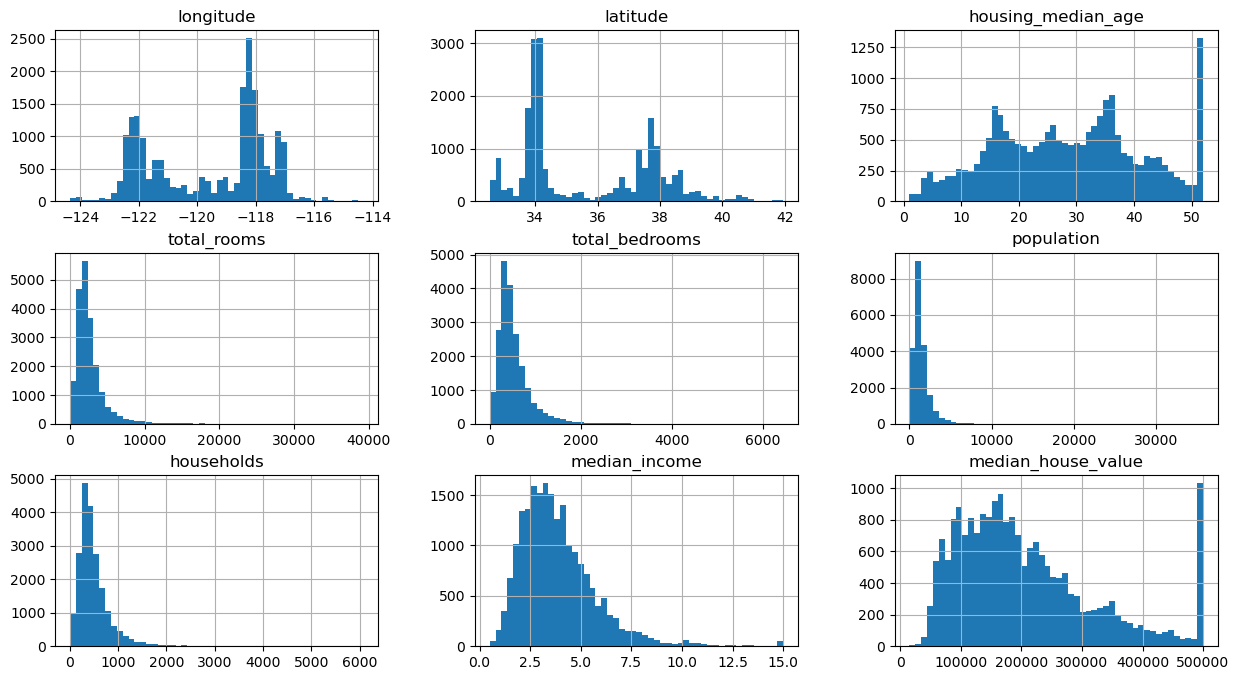

In [243]:
# Plots the histogram of each numerical attribute to look at the data distributions.

housing.hist(bins=50, figsize=(15,8))
plt.show()

Histograms are observed to be tail-heavy (right-skewed). If these are caused by outliers, they should be removed before feeding data into machine learning algorithm.

## Creating Test Set

Seperates a part of data to be used for testing trained machine learning models to evaluate their prediction performance.

There are two options to create test set.
- Using random sampling method to select observerations
- Using stratified sampling method to ensure both train and test set have same distribution

Let's go with the second option.

In [244]:
# Option 1
# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Option 2
housing["median_income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5])

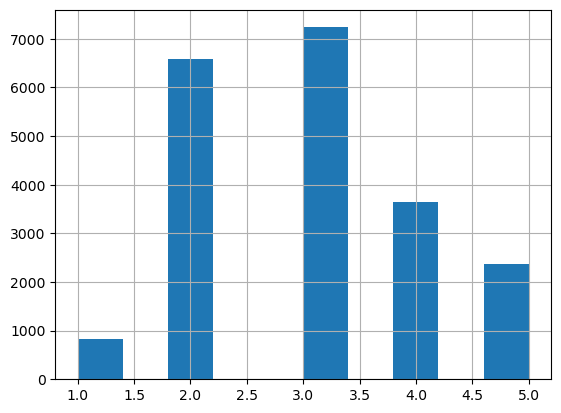

In [245]:
# Views distribution of median income categories

housing["median_income_cat"].hist()
plt.show()

In [246]:
# Splits data into train and test dataset applying stratification

train_set, test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["median_income_cat"], random_state=42)

The same stratified splitting could also be done using the following

    stratifiedShuffleSplitter = StratifiedShuffleSplit(
        n_splits=1,
        test_size=0.2,
        random_state=42)

    for train_idx, test_idx in stratifiedShuffleSplitter.split(
        housing, housing["median_income_cat"]):
        stratified_train_set = housing.iloc[train_idx]
        stratified_test_set = housing.iloc[test_idx]

In [247]:
# Checks if both train and test dataset have the same distribution
# on the median income category

pd.DataFrame({
    "Train Set Distribution": train_set["median_income_cat"].value_counts()/len(train_set),
    "Test Set Distribution": test_set["median_income_cat"].value_counts()/len(test_set)
    })

,Train Set Distribution,Test Set Distribution
median_income_cat,,
3,0.350594,0.350533
2,0.318859,0.318798
4,0.176296,0.176357
5,0.114462,0.114341
1,0.039789,0.039971


In [248]:
# Removes temporary attribute 'median_income_cat' from both the datasets as 
# this attribute will no longer be used later.

train_set.drop("median_income_cat", axis=1, inplace=True)
test_set.drop("median_income_cat", axis=1, inplace=True)

In [249]:
# Before further exploration and data manipulations in the following
# sections, let's have a copy of the training set and keeping test data aside

housing_train = train_set.copy()

## Exploratory Data Analysis (EDA)

### Visualizing Geographic Data

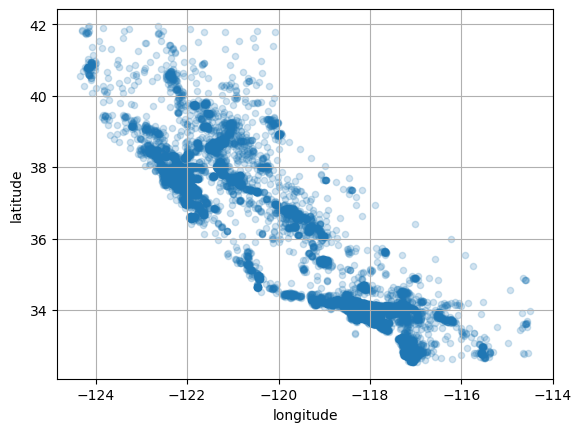

In [250]:
# Visualizes high-density areas
housing_train.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

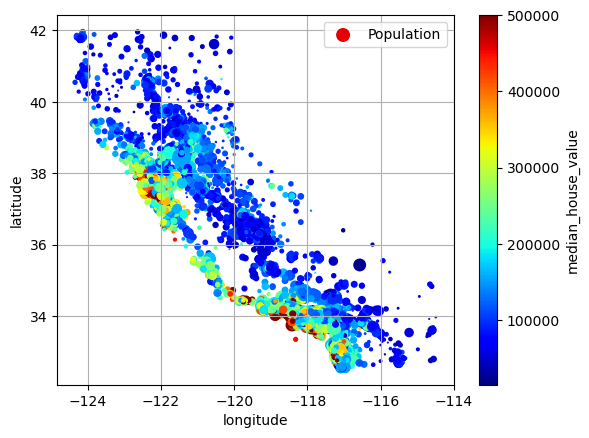

In [251]:
# Now, visualize geographic area to look for both high-density and expensive areas

housing_train.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=housing_train["population"]/100, label="Population",
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False)
plt.show()

Larger circles indicate areas with larger population. Circles with _red_ indicate expensive houses where the same with _blue_ indicate cheaper ones.

### Looking for Correlations

In [255]:
# Looks for correlations (amongst numerical data)

housing_train.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

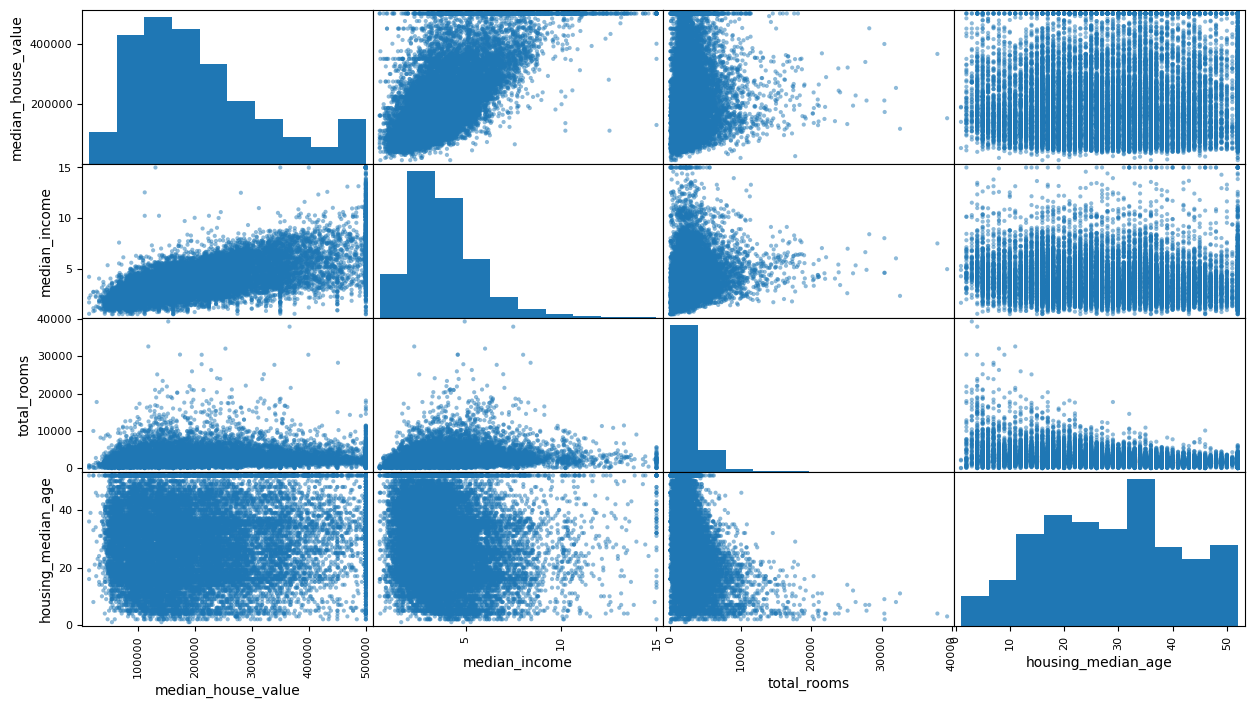

In [256]:
# Viewing correlations amonst top four attributes graphically

scatter_matrix(
    housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]],
    figsize=(15, 8))
plt.show()

The above correlation plot shows that the most promising attribute to predict median house value is the median income.

### Experimenting with Attribute Combinations

In [257]:
# Experimenting with various attribute combinations to check if any of these shows significant correlation with median house value.

housing_train["rooms_per_house"] = housing_train["total_rooms"]/housing_train["households"]

housing_train["bedrooms_ratio"] = housing_train["total_bedrooms"]/housing_train["total_rooms"]

housing_train["people_per_house"] = housing_train["population"]/housing_train["households"]

In [258]:
# Let's now check the correlations with new attributes

housing_train.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

The above correlations with newly calculated attribute with $median\_house\_value$ are as follows.
- New attribute $bedrooms\_ratio$ is more correlated (negatively) with $median\_house\_value$ than $total\_rooms$ or $total\_bedrooms$.
- $rooms\_per\_house$ is more correlated with $median\_house\_value$ than $total\_rooms$.

## Preparing Data for Machine Learning Algorithms

### Cleaning Data

It imputes missing data, encods text and categorical data, and scales and transforms the data.

#### Imputing Missing Data

In [259]:
# Seperates target from features

housing_train = train_set.drop("median_house_value", axis=1)
housing_train_labels = train_set["median_house_value"].copy()

**Handling missing values in attribute $total\_bedrooms$:**

The options are to deal with missing values:
- Removing observations with null values in the attribute
```
housing_train.dropna(subset=["total_bedrooms"], inplace=True)
```
- Removing the whole attribute
```
housing_train.drop("total_bedrooms", axis=1)
```
- Setting appropriate values (e.g. mean, median or zero) agains the null values
```
median = housing_train["total_bedrooms"].median()
housing_train["total_bedrooms"].fillna(median, inplace=True)
```

Let's go with the third option.

In [260]:
# Imputes missing attributes in train set.

# Initializes imputer
imputer = SimpleImputer(strategy="median")

# Considers only numeric columns as the imputer works on numeric data
housing_train_num = housing_train.drop("ocean_proximity", axis=1)

# Fits the imputer
imputer.fit(housing_train_num)

# Transforms the missing values in each column with learned median
housing_train_num_imputed = imputer.transform(housing_train_num)

# Creates a DataFrame out of transformed dataset
# housing_train_num_imputed = pd.DataFrame(
#     housing_train_num_imputed, index=housing_train_num.index, columns=housing_train_num.columns)

#### Encoding Text and Categorical Data

**Encods categorical data in attribute $ocean\_proximity$.**

Options are

1) Ordinal encoding
2) Binary encoding

Let's go with the second option.

In [261]:
# Initializes encoder
cat_encoder = OneHotEncoder(sparse_output=False)

# Set a variable to attribute column
housing_train_cat = housing_train[["ocean_proximity"]]

# Fits the encoder
cat_encoder.fit(housing_train_cat)

# Transforms the categorical data by transforming it
housing_train_cat_1hot = cat_encoder.transform(housing_train_cat)

The last two calls can also be combined together as

`housing_train_cat_1hot = cat_encoder.fit_transform(housing_cat)`

In [262]:
# Shows one-hot encoded information in densed array form [just for reference]
housing_train_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [263]:
# Shows the ordered list of categories related to one-hot encoding
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Scaling Features

Applies scaling transformations to relevant attributes as machine learning algorithms don't work well with (numerical) attributes having different scales.

The options are
- Min-max scaling (also known as normalization)
- Standardization

Let's go with the second option.

In [264]:
# Initializes the scaler
std_scaler = StandardScaler()

# Fits the scaler and then transforms the attribute values
housing_train_num_scaled = std_scaler.fit_transform(housing_train_num_imputed)

In [265]:
# Prints the shape of the transformed dataset with only numerical attributes
housing_train_num_scaled.shape

(16512, 8)

In [266]:
# Stacks numerically scaled data and categorically encoded data horizontally (column wise).
housing_train_transformed = np.hstack((housing_train_num_scaled, housing_train_cat_1hot))

# Checks the shape of transformed train set
housing_train_transformed.shape

(16512, 13)

Number of attributes has increased from 8 to 13 due to addition of 5 categorically encoded attributes.

In [267]:
# Just for reference, the train set is shown through DataFrame 

pd.DataFrame(
    housing_train_transformed, 
    columns=list(housing_train_num.columns) + cat_encoder.categories_[0].tolist())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
16508,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
16509,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
16510,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


 Now, this dataset is ready to be used in machine learning algorithm. But, instead of transforming numeric and non-numeric attributes idividually and then stacking back horizontally, transformation pipelines that can take care of tranforming different types of attributes in an integrated way and can be used as shown below.

### Creating Transformation Pipelines

In [268]:
# Setting data transformation pipeline for numerical attributes

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())])

# housing_num_tr = num_pipeline.fit_transform(housing_num)

In [269]:
# Another way to perform transformations to both numerical and categorical attritues
# is by using ColumnTransformer. This transformer can also have child pipeline such
# as the one defined by 'num_pipeline' and shown below.

num_attribs = list(housing_train_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)])

In [270]:
# Fits the pipeline and then transforms the data
housing_train_transformed = full_pipeline.fit_transform(housing_train)

In [271]:
# Checks the shape of transformed train set
housing_train_transformed.shape

(16512, 13)

### Transforming Test Data Through Pipleline

In [272]:
# Seperating targets from test set before transformations

# Stores targets in a seperate series
housing_test_labels = test_set["median_house_value"].copy()

# And, then drops the target attribute from the test set
test_set.drop("median_house_value", axis=1, inplace=True)

In [273]:
# Transforms the test set through the already fitted pipeline

housing_test_transformed = full_pipeline.transform(test_set)

In [274]:
# Checks the shape of transformed test set
housing_test_transformed.shape

(4128, 13)

Once these train set and test set are transformed and prepared through pipeline (or manually for that matter), then appropriate machine learning model(s) can be trained over the transformed train set and tested against transformed test set as shown in the subsequent steps.

## Model Training and Evaluation 

### Linear Regression

**Training Model**

In [275]:
# Initializes linear regression model
lin_reg = LinearRegression()

# Fits the model on the (transformed) train set
lin_reg.fit(housing_train_transformed, housing_train_labels)

LinearRegression()

**Performing Predictions**

In [160]:
# Performs predictions on train set
predictions_train = lin_reg.predict(housing_train_transformed)

# Prints predictions for few of houses
predictions_train[:5]

array([270886.93228264, 334830.60618945, 119856.18008898, 109210.92995274,
       305575.65811433])

In [161]:
# Performs predictions on test set
predictions_test = lin_reg.predict(housing_test_transformed)

# Prints predictions for few of houses
predictions_test[:5]

array([383993.91592627, 252310.54068352, 372503.59809196, 279372.70201381,
       225899.3327622 ])

**Evaluating Model Performance**

In [165]:
# Finds the linear regression model peformance over metric RMSE on both train and test set

lin_reg_rmse_train = root_mean_squared_error(housing_train_labels, predictions_train)

lin_reg_rmse_test = root_mean_squared_error(housing_test_labels, predictions_test)

print("Linear Regression RMSE: \n{:.2f} [Train], \n{:.2f} [Test]".format(lin_reg_rmse_train, lin_reg_rmse_test))

Linear Regression RMSE: 
68232.84 [Train], 
71002.84 [Test]


The model performance (prediction error) does not seem to be at satisfactory level, and it could be due to underfitting. To improve on the performance, the options are to go for 
- relative powerful model,
- providing better features into algorithm, or
- reduce the model constraint

Let's now try on the first option and use one of the tree-based non-linear regression algorithm called Decision Tree Regressor.

### Decision Tree Regression

**Training Model**

In [169]:
# Initializes decision tree regression model
dtree_reg = DecisionTreeRegressor()

# Fits the model on the (transformed) train set
dtree_reg.fit(housing_train_transformed, housing_train_labels)

DecisionTreeRegressor()

**Performing Predictions**

In [170]:
# Performs predictions on train set
predictions_train = dtree_reg.predict(housing_train_transformed)

# Performs predictions on test set
predictions_test = dtree_reg.predict(housing_test_transformed)

**Evaluating Model Performance**

In [172]:
# Finds the decision tree regression model peformance over metric RMSE on both train and test set

dtree_reg_rmse_train = root_mean_squared_error(housing_train_labels, predictions_train)

dtree_reg_rmse_test = root_mean_squared_error(housing_test_labels, predictions_test)

print("Decision Tree Regression RMSE: \n{:.2f} [Train], \n{:.2f} [Test]".format(dtree_reg_rmse_train, dtree_reg_rmse_test))

Decision Tree Regression RMSE: 
0.00 [Train], 
68077.61 [Test]


The above mentioned performance on train set indicates that it is highly likely that the model is badly overfitted.

### Random Forest Regression

**Training Model**

In [173]:
# Initializes random forest regression model
rf_reg = RandomForestRegressor()

# Fits the model on the (transformed) train set
# NOTE: The training may take several seconds to complete.
rf_reg.fit(housing_train_transformed, housing_train_labels)

RandomForestRegressor()

**Performing Predictions**

In [174]:
# Performs predictions on train set
predictions_train = rf_reg.predict(housing_train_transformed)

# Performs predictions on test set
predictions_test = rf_reg.predict(housing_test_transformed)

**Evaluating Model Performance**

In [175]:
# Finds the random forest regression model peformance over metric RMSE on both train and test set

rf_reg_rmse_train = root_mean_squared_error(housing_train_labels, predictions_train)

rf_reg_rmse_test = root_mean_squared_error(housing_test_labels, predictions_test)

print("Random Forest Regression RMSE: \n{:.2f} [Train], \n{:.2f} [Test]".format(rf_reg_rmse_train, rf_reg_rmse_test))

Random Forest Regression RMSE: 
18058.82 [Train], 
49416.67 [Test]


Amongst the algorthms that were tried in this experiment, random forests worked relative better for this task. However, considering the difference between train RMSE and test RMSE, the model is still found to be overfitted quite a lot. Possible solutions are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

In [183]:
# Let's list both train and test performance against these three algorithms

pd.DataFrame({
    "Model": ["Linear Regressor", "Decision Tree Regressor", "Random Forests"], 
    "Train Error (RMSE)": [lin_reg_rmse_train, dtree_reg_rmse_train, rf_reg_rmse_train],
    "Test Error (RMSE)": [lin_reg_rmse_test, dtree_reg_rmse_test, rf_reg_rmse_test]
})

,Model,Train Error (RMSE),Test Error (RMSE)
0,Linear Regressor,68232.835151,71002.837769
1,Decision Tree Regressor,0.000000,68077.608917
2,Random Forests,18058.819385,49416.665030


### Cross Validation
Derives a more accurate estimate of model prediction performance by averaging model performance measured over a set of random train and test set split.

In [179]:
# Initializes random forest regression model - the best found so far
rf_reg = RandomForestRegressor()

# Performs cross-validation on random forest regressor model
# NOTE: This may take several seconds to complete

rf_reg_rmse_cv = -cross_val_score(
    rf_reg, 
    housing_train_transformed, 
    housing_train_labels, 
    scoring="neg_root_mean_squared_error", 
    cv=10, 
    n_jobs=-1, 
    verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ........................... score: (test=-48427.481) total time=  20.1s
[CV] END ........................... score: (test=-49850.723) total time=  21.0s
[CV] END ........................... score: (test=-49545.462) total time=  21.3s
[CV] END ........................... score: (test=-48663.284) total time=  21.4s


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   21.4s remaining:   49.9s


[CV] END ........................... score: (test=-49353.281) total time=  21.6s
[CV] END ........................... score: (test=-49200.457) total time=  21.8s
[CV] END ........................... score: (test=-47189.148) total time=  22.0s


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   22.0s remaining:    9.4s


[CV] END ........................... score: (test=-48552.829) total time=  22.1s
[CV] END ........................... score: (test=-49592.572) total time=  14.4s
[CV] END ........................... score: (test=-48959.133) total time=  14.1s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   35.1s finished


In [181]:
print("Random Forest Cross Validation Statistics:\n {:.2f} [Mean RMSE]\n {:.2f} [Std. Deviation]".format(
    np.mean(rf_reg_rmse_cv), np.std(rf_reg_rmse_cv)))

Random Forest Cross Validation Statistics:
 48933.44 [Mean RMSE]
 735.87 [Std. Deviation]


The observations are as follows.

+ Linear regressor underfits the data, and may not be a deserving candidate for this solution.
+ Decision tree regressor also overfits on the data badly. The options available to try to improve on the performance is to apply regularization to model parameters and/or increase training data.
+ Random forest regressor also gets overfitted, but overall performance is better than the other two models.

### Saving the Models

In [185]:
# NOTE: Make sure a folder "models" exists in the current working directory

joblib.dump(lin_reg, "./models/linear_regressor.pkl")
joblib.dump(dtree_reg, "./models/decision_tree_regressor.pkl")
joblib.dump(rf_reg, "./models/random_forests_regressor.pkl")

['./models/random_forests_regressor.pkl']

## Fine-tuning Model

With the consideration that Random Forests Regressor is best out of the three models that were tested, let's now try to fine-tune the model by adjusting its hyperparameters so that it can perform even better. And this hyperparameters tuning can be done using one of two approaches mentioned below.

+ **Grid Search:** Values against hyperparamters of interest needs to be mentioned manually, and model's performance will be determind over all possible combination of hyperparameter values.
+ **Random Search:** 

### Grid Search

In [190]:
# Sets hyperparamer combination with their values for grid search to try on
hp_grid = {"n_estimators": [30, 90, 120, 180], "max_features": [2, 4, 6, 8, 10]}

In [193]:

# Initializes random forest regression model
rf_reg = RandomForestRegressor()

# Initializes grid search
grid_search = GridSearchCV(
    rf_reg,                                 # Estimator
    hp_grid,                                # Hyperparameters combinations
    scoring="neg_root_mean_squared_error",  # Strategy to evaluate the performance of the cross-validated model on the test set.
    n_jobs=-1,                              # Making use of all available processors
    cv=5,                                   # Number of folds
    verbose=1,                              # Controls the verbosity
    return_train_score=True                 # Default: False
)

# NOTE: The following grid search over cross validation may take several minutes to complete.
grid_search.fit(housing_train_transformed, housing_train_labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [2, 4, 6, 8, 10],
                         'n_estimators': [30, 90, 120, 180]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [202]:
# Shows the mean test RMSE for each combination of hyperparameters
-grid_search.cv_results_["mean_test_score"]

array([52234.74518011, 51320.82616439, 51190.60529242, 50862.70888491,
       50024.58285441, 49397.23370621, 49222.85906247, 49117.98050723,
       49820.5117745 , 49068.16105792, 48754.67870794, 48698.38053256,
       49573.26389283, 48789.63710904, 48754.9363441 , 48733.17663482,
       49473.00575547, 49045.47283424, 48851.98883229, 48739.73014059])

In [201]:
# Prints the lowest test RMSE
np.min(-grid_search.cv_results_["mean_test_score"])

48698.38053256378

In [203]:
# Shows the best combination of hyperparameters that scores lowest CV RMSE
grid_search.best_params_

{'max_features': 6, 'n_estimators': 180}

This mean RMSE of random forest estimator with specif set of hyperparameters is relatively better than the mean RMSE recorded over CV with default parameter values of the estimator.

### Random Search

Grid Search is fine when hyperparameters search space is smaller, but when it is larger, Random Search could be a better option to try out, and it comes with the following benifits.

+ It allows to set more number hyperparameter values compared number of hyperparameters set manually in grid search to try for.
+ Total number of evaluations or iterations can also be set to allocate for the computing budget.

In [205]:
# Sets hyperparamers with their range
hp_random = {"n_estimators": randint(100, 250), "max_features": randint(2, 10)}

In [208]:
# Initializes random forest regression model
rf_reg = RandomForestRegressor()

random_search = RandomizedSearchCV(
    rf_reg,                                 # Estimator
    hp_random,                              # Hyperparameters with range
    n_iter=30,                              # Number of parameter settings that are sampled
    scoring="neg_root_mean_squared_error",  # Strategy to evaluate the performance of the cross-validated model on the test set.
    n_jobs=-1,                              # Making use of all available processors
    cv=5,                                   # Number of folds
    verbose=1,                              # Controls the verbosity
    return_train_score=True                 # Default: False
)

# NOTE: The following random search over cross validation may take several minutes to complete.
random_search.fit(housing_train_transformed, housing_train_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/pradip/anaconda3/envs/keras3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7260edfe9430>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7260edfea5a0>},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=1)

In [211]:
# Prints the lowest test RMSE
np.min(-random_search.cv_results_["mean_test_score"])

48503.65760334477

In [212]:
# Shows the best combination of hyperparameters that scores lowest CV RMSE
random_search.best_params_

{'max_features': 7, 'n_estimators': 229}

In [213]:
# Gets reference to the best estimator
final_model = random_search.best_estimator_

Model trained with best hyperparameters found by random search resulted slightly better performance as compared to model trained with best hyperparameters found by grid search.

### Analysing Features Importance

In [219]:
# Shows the list of all features along with their importance found by random forest regressor.
# Features with lower important can be considered to be dropped off.

sorted(
    zip(
        final_model.feature_importances_, 
        num_attribs+list(full_pipeline.named_transformers_["cat"].categories_[0])
    ), 
    reverse=True
)

[(0.4273313395350643, 'median_income'),
 (0.15254314488930215, 'INLAND'),
 (0.11718639413969685, 'longitude'),
 (0.103717652894324, 'latitude'),
 (0.047462156783493116, 'housing_median_age'),
 (0.03957860933642086, 'population'),
 (0.03301692746834912, 'total_rooms'),
 (0.028260819092271783, 'total_bedrooms'),
 (0.02552649601233987, 'households'),
 (0.015610573866787898, '<1H OCEAN'),
 (0.006827485926133867, 'NEAR OCEAN'),
 (0.002614149064167693, 'NEAR BAY'),
 (0.0003242509916486207, 'ISLAND')]

It is clear from the above list that ocean proximity categies except one ("INLAND") are not of importance, and can be considered to be dropped of.

### Evaluating Final Model on Test Data

After fine-tuing the model, let's now get an estimate of the final model's performance over the test data.

In [222]:
# Performs prediction on the test data
predictions_test = final_model.predict(housing_test_transformed)

print("Random Forest Test Error:\n {:.2f} [Meam RMSE]\n {:.2f} [Error Std. Deviation]".format(
    root_mean_squared_error(housing_test_labels, predictions_test),  # RMSE
    np.std(np.abs(housing_test_labels - predictions_test))))         # Error standard deviation


Random Forest Test Error:
 49014.62 [Meam RMSE]
 37417.45 [Error Std. Deviation]


### Saving the Pipeline and Final Model

In [223]:
# NOTE: Make sure a folder "models" exists in the current working directory

joblib.dump(full_pipeline, "./models/full_pipeline.pkl")
joblib.dump(final_model, "./models/random_forests_regressor_final.pkl")

['./models/random_forests_regressor_final.pkl']

## Next Steps

After getting an estimation on final model's performance, the following are the probable steps for next activities for any professional projects.

+ Computing an interval, for example at 95% confidence, to get an idea how precise generalization error that was estimated over test data.
+ Deploying the model along with full preprocessing and prediction pipelines into staging or production environment either as intergated within the application itself or as a web service that can be used by any application.
+ Keep monitoring the overall model performance at regular interval to realize the need for any modifications or upgrade in modeling to take place.
+ Keep checking and evaluating data quality.
+ Keep versioning every model and datasets and backing up to rollback to previous state if the need arises.
